In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import svm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_curve, precision_recall_curve, PrecisionRecallDisplay, roc_auc_score, RocCurveDisplay, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

# from sklearn.utils.validation import check_missing_values
# from sklearn.datasets import make_classification
# from collections import Counter

import torch
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
device = "cuda"
#device = "cpu"

In [3]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [4]:
# load data on Zhixuan's computer
data = pd.read_csv('D:\\User\Zhixuan Ge\Onedrive TUDelft\OneDrive - Delft University of Technology\Courses\ML for EE\SZD\S&S_SZD\Project_Data_EE4C12_S&S_SZD.csv')
data

,Patient,annotation,min|FP1-F7,min|F7-T3,min|T3-T5,min|T5-O1,min|FP2-F8,min|F8-T4,min|T4-T6,min|T6-O2,...,norm_power_HF|CZ-C4,norm_power_HF|C4-T4,norm_power_HF|FP1-F3,norm_power_HF|F3-C3,norm_power_HF|C3-P3,norm_power_HF|P3-O1,norm_power_HF|FP2-F4,norm_power_HF|F4-C4,norm_power_HF|C4-P4,norm_power_HF|P4-O2
0,258,1,50,61,57,53,39,35,39,35,...,0.016087,0.066920,0.102402,0.481384,0.690787,0.154544,0.062533,0.046460,0.066575,0.086999
1,258,1,48,62,60,46,38,35,39,33,...,0.024006,0.064857,0.031791,0.225788,0.409987,0.184671,0.071133,0.022369,0.079494,0.047536
2,258,1,51,60,59,45,38,36,40,36,...,0.037326,0.100177,0.050009,0.622584,0.394504,0.225516,0.050673,0.044906,0.102142,0.068105
3,258,1,49,58,56,42,36,36,41,37,...,0.027546,0.107883,0.014017,0.359140,0.276964,0.104977,0.018042,0.079467,0.078255,0.089385
4,258,1,45,57,61,41,35,37,41,37,...,0.036820,0.182520,0.031397,0.328354,0.156929,0.151952,0.047532,0.135071,0.098320,0.137701
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55451,11580,-1,75,73,81,80,66,80,77,75,...,0.244334,0.625396,0.023821,0.058277,0.083594,0.114426,0.119654,0.295364,0.185930,0.199585
55452,11580,-1,74,74,77,71,79,75,82,77,...,0.588236,0.743060,0.076294,0.332341,0.228458,0.170603,0.351418,0.638666,0.490806,0.307429
55453,11580,-1,72,76,72,73,74,76,80,76,...,0.296041,0.770194,0.041190,0.090919,0.186074,0.216797,0.231053,0.770637,0.285257,0.413382
55454,11580,-1,77,82,74,75,82,85,80,76,...,0.440360,0.720855,0.026959,0.026340,0.077674,0.269610,0.186769,0.790173,0.473615,0.415771


In [5]:
# pca
from sklearn.decomposition import PCA

y = np.int32(data['annotation'].values)
X = data.iloc[:, 2:].values

pca = PCA()
pca.fit(X)
X_pca =pca.transform(X)
print(X_pca.shape)

(55456, 360)


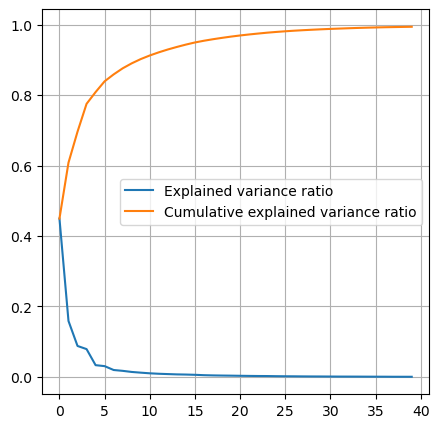

In [7]:
plt.figure(figsize=(5,5))

# They can be plotted in a same graph
plt.plot(pca.explained_variance_ratio_[:40], label='Explained variance ratio',)
plt.plot(pca.explained_variance_ratio_.cumsum()[:40], label='Cumulative explained variance ratio')
plt.grid()
plt.legend()
plt.show()

plt.show()
# sum of the first 20 components is over 0.9 and close to 1

In [46]:
scaler = StandardScaler().fit(X_pca[:, :])
X_scaled = scaler.transform(X_pca[:, :])

#scaler = StandardScaler().fit(X)
#X_scaled = scaler.transform(X)

In [47]:
Shuffle_state = 42
test_size = 0.25
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=Shuffle_state)

In [48]:
clf_lr = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_pred = clf_lr.predict(X_test)

In [49]:
#Performance metrics
Accuracy_LR = accuracy_score(y_test, y_pred)
F1_LR = accuracy_score(y_test, y_pred)
Precision_LR = accuracy_score(y_test, y_pred)
Recall_LR = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(Accuracy_LR))
print("F1 score: " + str(F1_LR))
print("Recall score: " + str(Recall_LR))
print("Precision score: " + str(Precision_LR))

Accuracy: 0.8429746105020196
F1 score: 0.8429746105020196
Recall score: 0.8429746105020196
Precision score: 0.8429746105020196


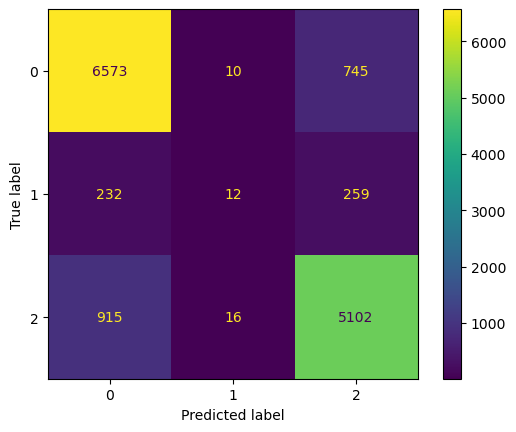

In [50]:
#Confusion Matrix
cm_2c = confusion_matrix(y_test, y_pred)
cm_display_2c = ConfusionMatrixDisplay(cm_2c).plot()
plt.show()

In [34]:
#Performance metrics
Accuracy_LR = accuracy_score(y_test, y_pred)
F1_LR = accuracy_score(y_test, y_pred)
Precision_LR = accuracy_score(y_test, y_pred)
Recall_LR = accuracy_score(y_test, y_pred)
print("Accuracy: " + str(Accuracy_LR))
print("F1 score: " + str(F1_LR))
print("Recall score: " + str(Recall_LR))
print("Precision score: " + str(Precision_LR))

Accuracy: 0.8426139642238892
F1 score: 0.8426139642238892
Recall score: 0.8426139642238892
Precision score: 0.8426139642238892


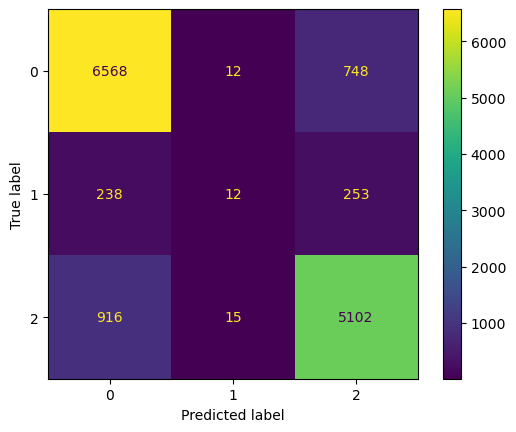

In [35]:
#Confusion Matrix
cm_2c = confusion_matrix(y_test, y_pred)
cm_display_2c = ConfusionMatrixDisplay(cm_2c).plot()
plt.show()